In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train_df = pd.read_csv('../Data/train_df0.1.csv', index_col=None)
test_df = pd.read_csv('../Data/test_df0.1.csv', index_col=False)

In [3]:
# set predict and response variables
x_train = train_df.drop(columns=['HadHeartAttack'])
y_train = train_df.HadHeartAttack
x_test = test_df.drop(columns=['HadHeartAttack'])
y_test = test_df.HadHeartAttack

In [4]:
# set learning rates
learning_rates = np.arange(0.1, 2.4, 0.3)

train_accur = []
test_accur = []

for lr in learning_rates:
    ada = AdaBoostClassifier(learning_rate=lr, n_estimators=50)
    ada.fit(x_train, y_train)
    train_accur.append(ada.score(x_train, y_train))
    test_accur.append(ada.score(x_test, y_test))
    

max accuracy of 0.95 at 1.6


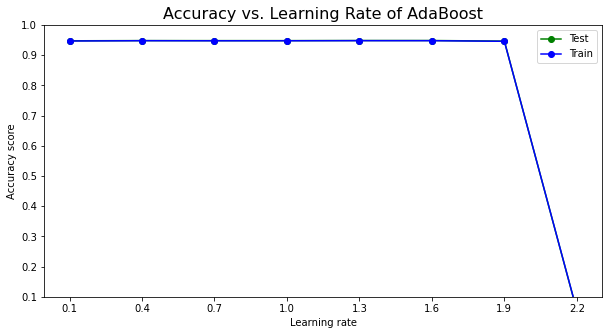

In [5]:
# plot accuracy vs. learning rate
max_test_accuracy = test_accur[np.argmax(test_accur)]
max_test_lr = learning_rates[np.argmax(test_accur)]
print(f'max accuracy of {round(max_test_accuracy, 2)} at {round(max_test_lr, 2)}')

plt.figure(figsize=(10, 5))
plt.plot(learning_rates, test_accur, c='green', marker='o', label='Test')
plt.plot(learning_rates, train_accur, c='blue', marker='o', label='Train')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy score')
plt.xticks(learning_rates)
plt.ylim(0.1, 1)
plt.title('Accuracy vs. Learning Rate of AdaBoost', size=16)
plt.legend()
plt.show()

10 max leaf nodes: max accuracy of 0.9496 at 0.1
20 max leaf nodes: max accuracy of 0.9491 at 0.1
30 max leaf nodes: max accuracy of 0.9487 at 0.1
40 max leaf nodes: max accuracy of 0.9478 at 0.1


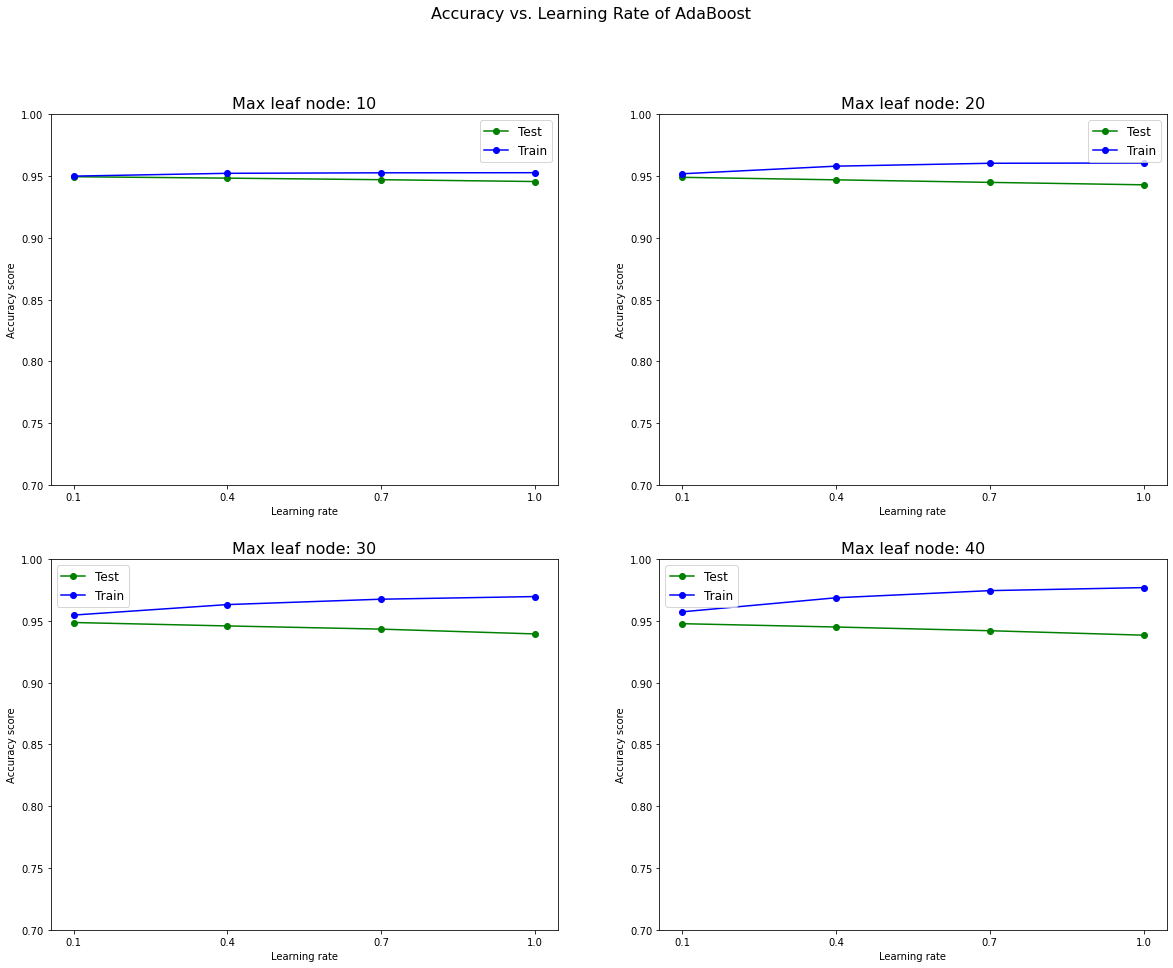

In [10]:
# narrower learning rate range and explore max_leaf_nodes

fig = plt.figure(figsize=(20, 15))
fig.suptitle('Accuracy vs. Learning Rate of AdaBoost', fontsize=16)

learning_rates = np.arange(.1, 1.3, 0.3)
max_leaf_nodes = np.arange(10, 50, 10)
idx=1

class_report = []
for node in max_leaf_nodes:
    train_accur = []
    test_accur = []
    
    for lr in learning_rates:
        weak_learner = DecisionTreeClassifier(max_leaf_nodes=node)
        ada = AdaBoostClassifier(
            base_estimator = weak_learner,
            learning_rate=lr, 
            n_estimators=200
        )
        ada.fit(x_train, y_train)
        train_accur.append(ada.score(x_train, y_train))
        test_accur.append(ada.score(x_test, y_test))
        
    max_test_accuracy = test_accur[np.argmax(test_accur)]
    max_test_lr = learning_rates[np.argmax(test_accur)]
    print(f'{node} max leaf nodes: max accuracy of {round(max_test_accuracy, 4)} at {round(max_test_lr, 4)}')
    
    fig.add_subplot(2, 2, idx)
    idx += 1
    plt.plot(learning_rates, test_accur, c='green', marker='o', label='Test')
    plt.plot(learning_rates, train_accur, c='blue', marker='o', label='Train')    
    plt.xlabel('Learning rate')
    plt.xticks(learning_rates)
    plt.ylabel('Accuracy score')
    plt.ylim(0.7, 1)
    plt.legend(prop={'size': 12})
    title = "Max leaf node: " + str(node)
    plt.title(title, size=16)
plt.show()


In [11]:
weak_learner = DecisionTreeClassifier(max_leaf_nodes=10)
ada = AdaBoostClassifier(
            base_estimator = weak_learner,
            learning_rate=0.8,
            n_estimators=85
        )
ada.fit(x_train, y_train)
pred = ada.predict(x_test)
accur = accuracy_score(y_test, pred)
classification = classification_report(y_test, pred)
print(classification)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     69825
           1       0.54      0.25      0.34      3982

    accuracy                           0.95     73807
   macro avg       0.75      0.62      0.66     73807
weighted avg       0.94      0.95      0.94     73807



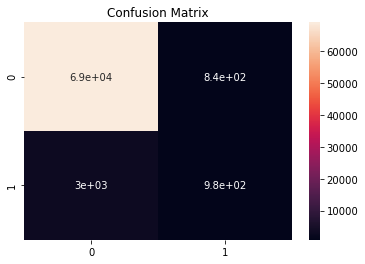

In [20]:
conf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.show()

In [23]:
features = x_train.columns
feature_importance_scores = ada.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance_scores})

feature_importance_df.sort_values(by=['Importance'], ascending=False)

,Feature,Importance
5,AgeCategory,0.141462
2,HeightInMeters,0.092622
1,SleepHours,0.075353
0,PhysicalHealthDays,0.057454
3,GeneralHealth,0.056424
4,RemovedTeeth,0.045708
6,SmokerStatus_ord,0.036174
25,LastCheckupTime,0.035085
9,ChestScan,0.034061
18,HadAngina,0.032750


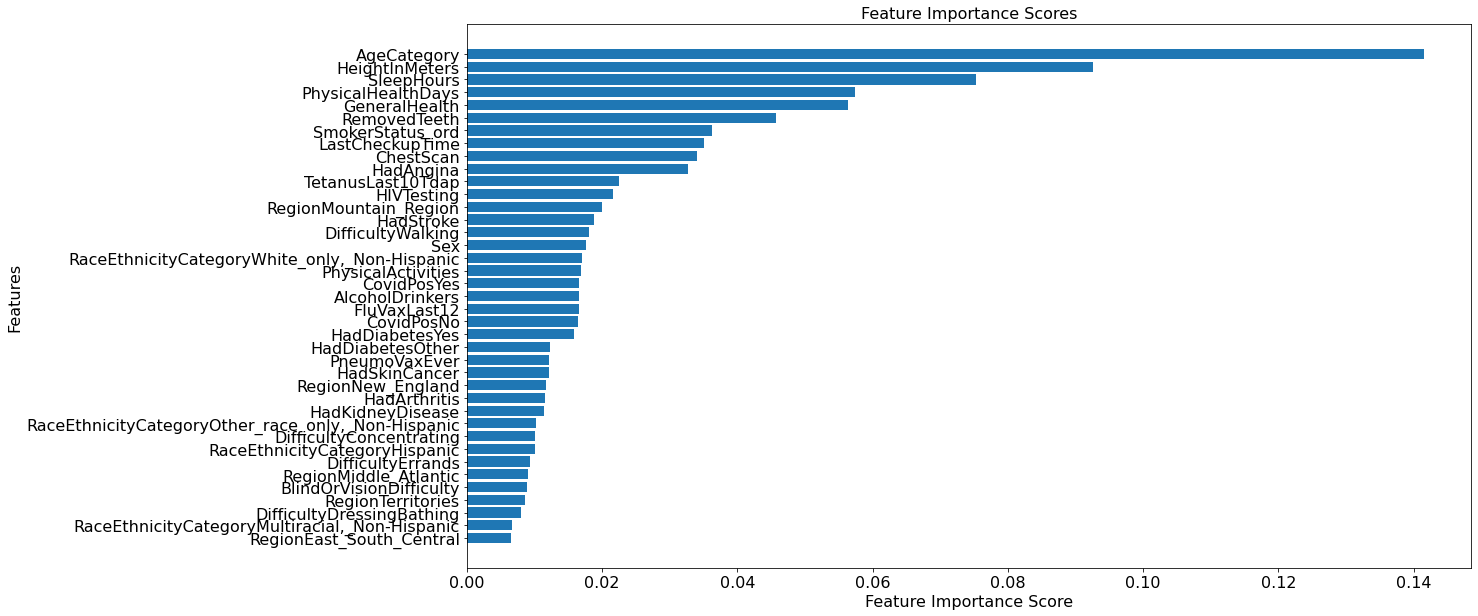

In [24]:
sorted_indices = feature_importance_scores.argsort()[::1]
sorted_features = features[sorted_indices]
sorted_scores = feature_importance_scores[sorted_indices]

# plot feature importance scores
plt.figure(figsize=(18, 10))
plt.barh(range(len(sorted_features)), sorted_scores, align="center")
plt.yticks(range(len(sorted_features)), sorted_features, fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Feature Importance Score", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.title("Feature Importance Scores", fontsize=16)
plt.show()

Reference:
- https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py
- https://medium.com/@24littledino/adaboost-vs-gradient-boosting-classification-in-python-bc6d1624fe65
- https://www.analyticsvidhya.com/blog/2021/03/introduction-to-adaboost-algorithm-with-python-implementation/

=======================================================================================